### Notebook Imports

In [1]:
from datetime import datetime
import spacy

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from helpers import get_token, get_chat_id

TOKEN = get_token('data/token.txt')
CHAT_ID = get_chat_id('data/chatid.txt')

with open('outputs/summary.txt', 'r') as f:
    answer = f.read()

In [4]:
import telebot

bot = telebot.TeleBot(TOKEN)
bot.config['api_key'] = TOKEN

In [5]:
from helpers import split

def send_text_message(text,chat_id):
    
    sent_text = nltk.sent_tokenize(text)
    new = split(sent_text,5)
    for sent in new:
        if sent:
            bot.send_message(chat_id, '. '.join(sent))

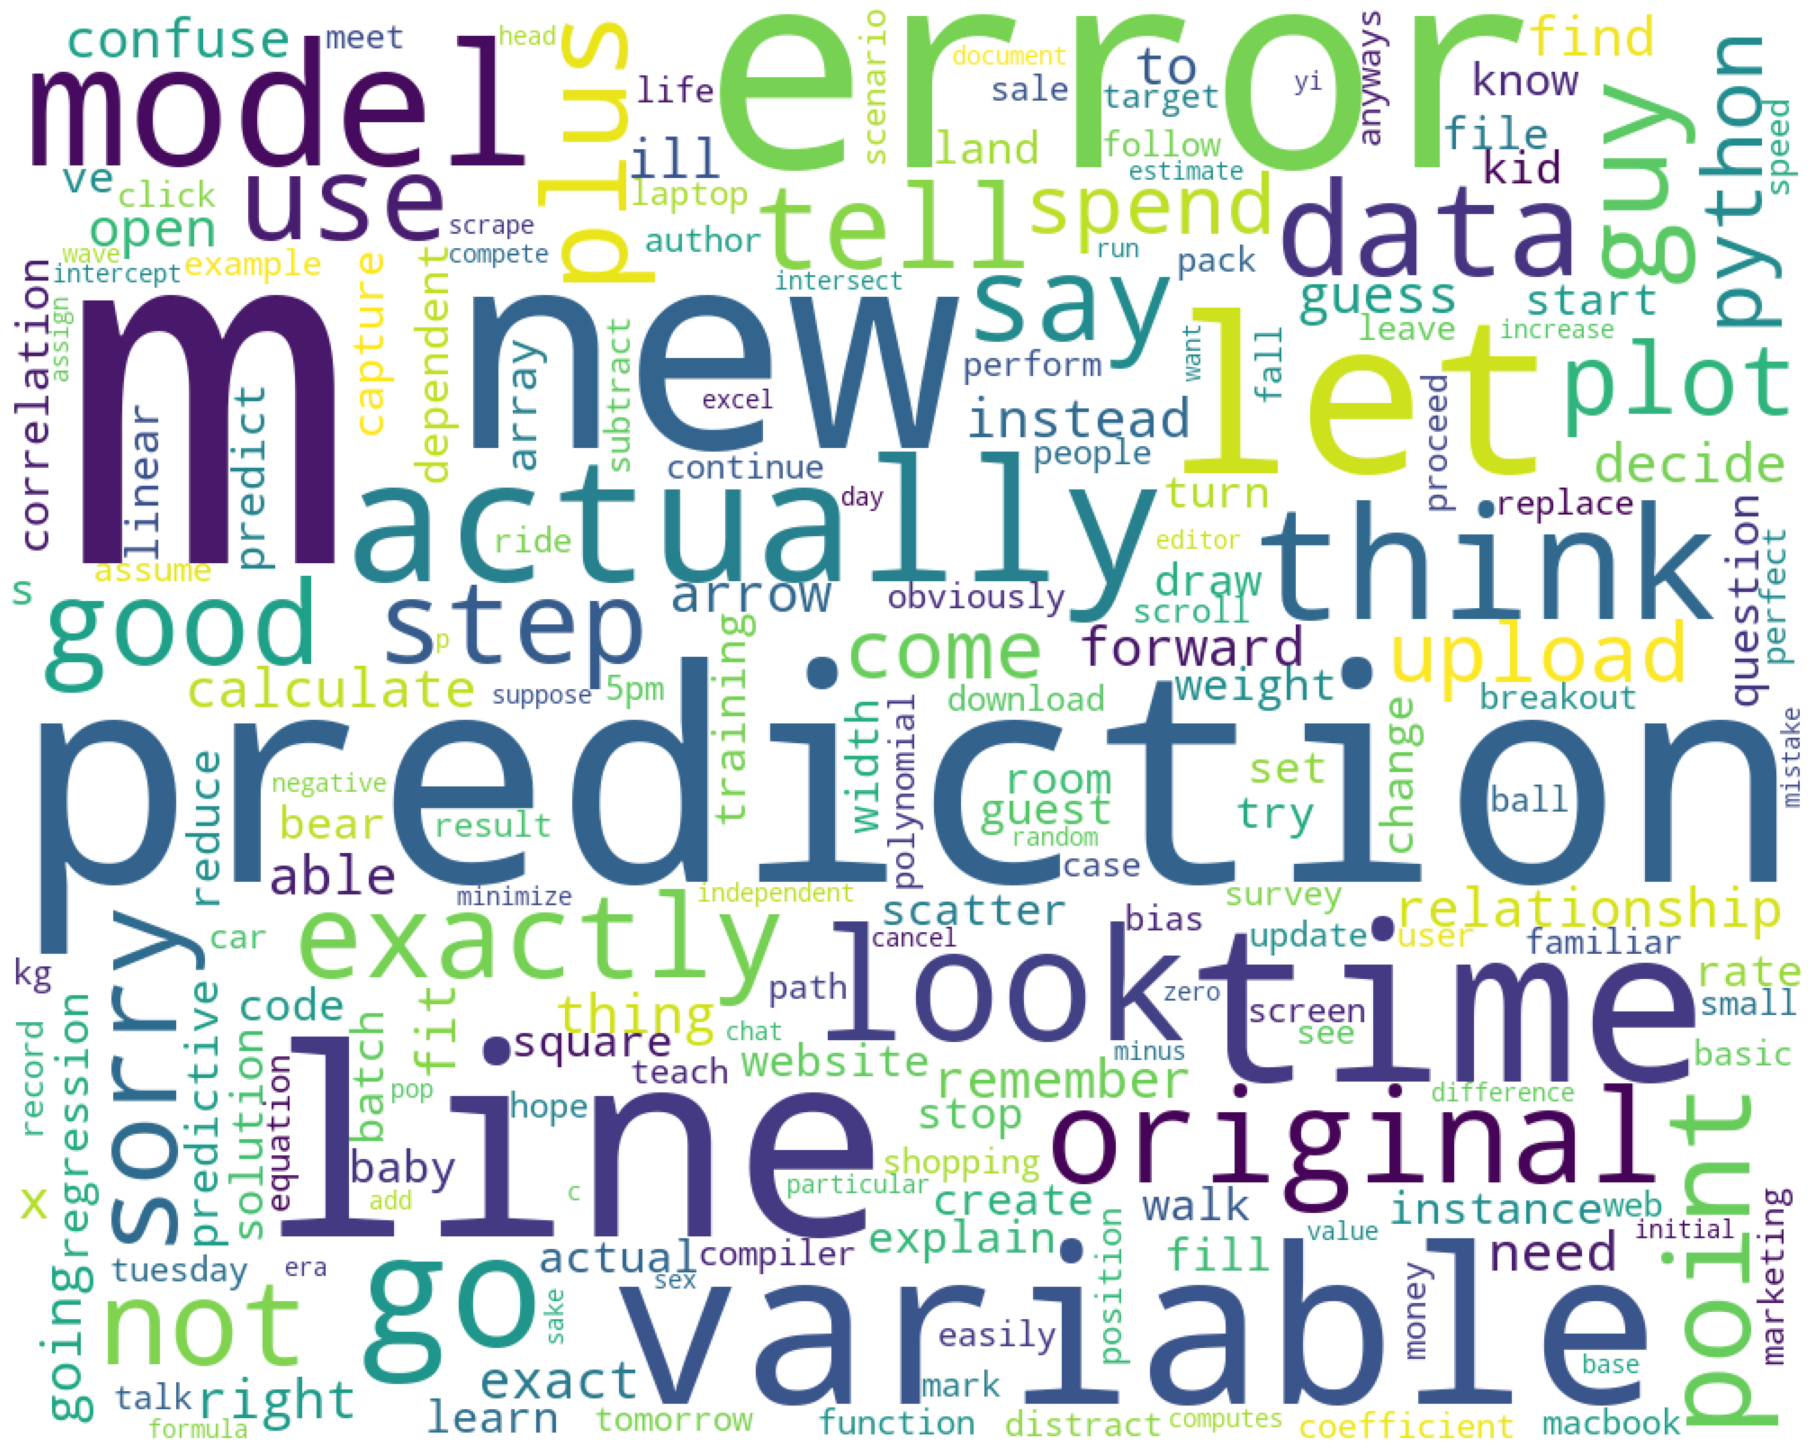

In [6]:
from helpers import send_picture, save_wordcloud

send_text_message(answer,CHAT_ID)
save_wordcloud(answer)
send_picture('outputs/wordcloud.jpg',CHAT_ID)